## Importing Libraries and doing some primary analysis

In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [121]:
df=pd.read_csv(r'/content/processed.cleveland.data', encoding = 'latin1',names=['age',
'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','output_val'])

In [122]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output_val
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [123]:
df['output_val'].replace(to_replace=[1,2,3,4],value=1,inplace=True)

In [124]:
df['output_val'].unique()

array([0, 1])

In [125]:
df['output_val'].value_counts()

0    164
1    139
Name: output_val, dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    float64
 1   sex         303 non-null    float64
 2   cp          303 non-null    float64
 3   trestbps    303 non-null    float64
 4   chol        303 non-null    float64
 5   fbs         303 non-null    float64
 6   restecg     303 non-null    float64
 7   thalach     303 non-null    float64
 8   exang       303 non-null    float64
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    float64
 11  ca          303 non-null    object 
 12  thal        303 non-null    object 
 13  output_val  303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [127]:
#removing NUll values
#null values in the dataset are represented by '?' sign
#create index lists for the row which contain NaNs

ca_Nan_index= df.index[df.ca == '?'].tolist()
thal_Nan_index = df.index[df.thal == '?'].tolist()
drop_Nan_index = thal_Nan_index + ca_Nan_index
df = df.drop(df.index[drop_Nan_index])

In [128]:
df = df.astype({"age":'float', "sex":'float',"cp":'float',"trestbps":'float',"thalach":'float', "chol":'float',"fbs":'float',"restecg":'float',
                "exang":'float',"oldpeak":'float',"slope":'float',"ca":'float',"thal":'float'})

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         297 non-null    float64
 1   sex         297 non-null    float64
 2   cp          297 non-null    float64
 3   trestbps    297 non-null    float64
 4   chol        297 non-null    float64
 5   fbs         297 non-null    float64
 6   restecg     297 non-null    float64
 7   thalach     297 non-null    float64
 8   exang       297 non-null    float64
 9   oldpeak     297 non-null    float64
 10  slope       297 non-null    float64
 11  ca          297 non-null    float64
 12  thal        297 non-null    float64
 13  output_val  297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


# **EDA **
here we are analyzing the data using visualizing techniques using seaborn and matplotlib

In [10]:
import seaborn as sns

no_disease=df['output_val'].value_counts()[0]
yes_disease=df['output_val'].value_counts()[1]

print("people with disease = "+str(yes_disease))
print("people without disease = "+str(no_disease))




people with disease = 137
people without disease = 160


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'with heart disease vs. without heart disease')

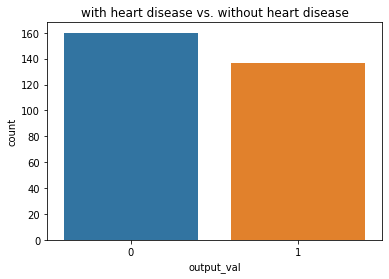

In [12]:
sns.countplot(df.output_val).set_title("with heart disease vs. without heart disease")

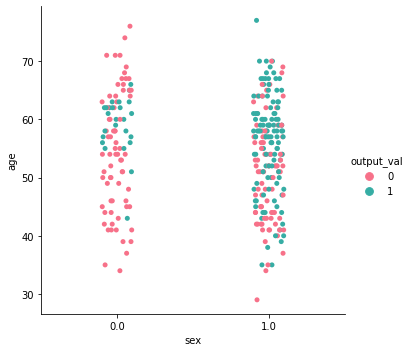

In [13]:
sns.catplot(data=df, x='sex', y='age',  hue='output_val', palette='husl')

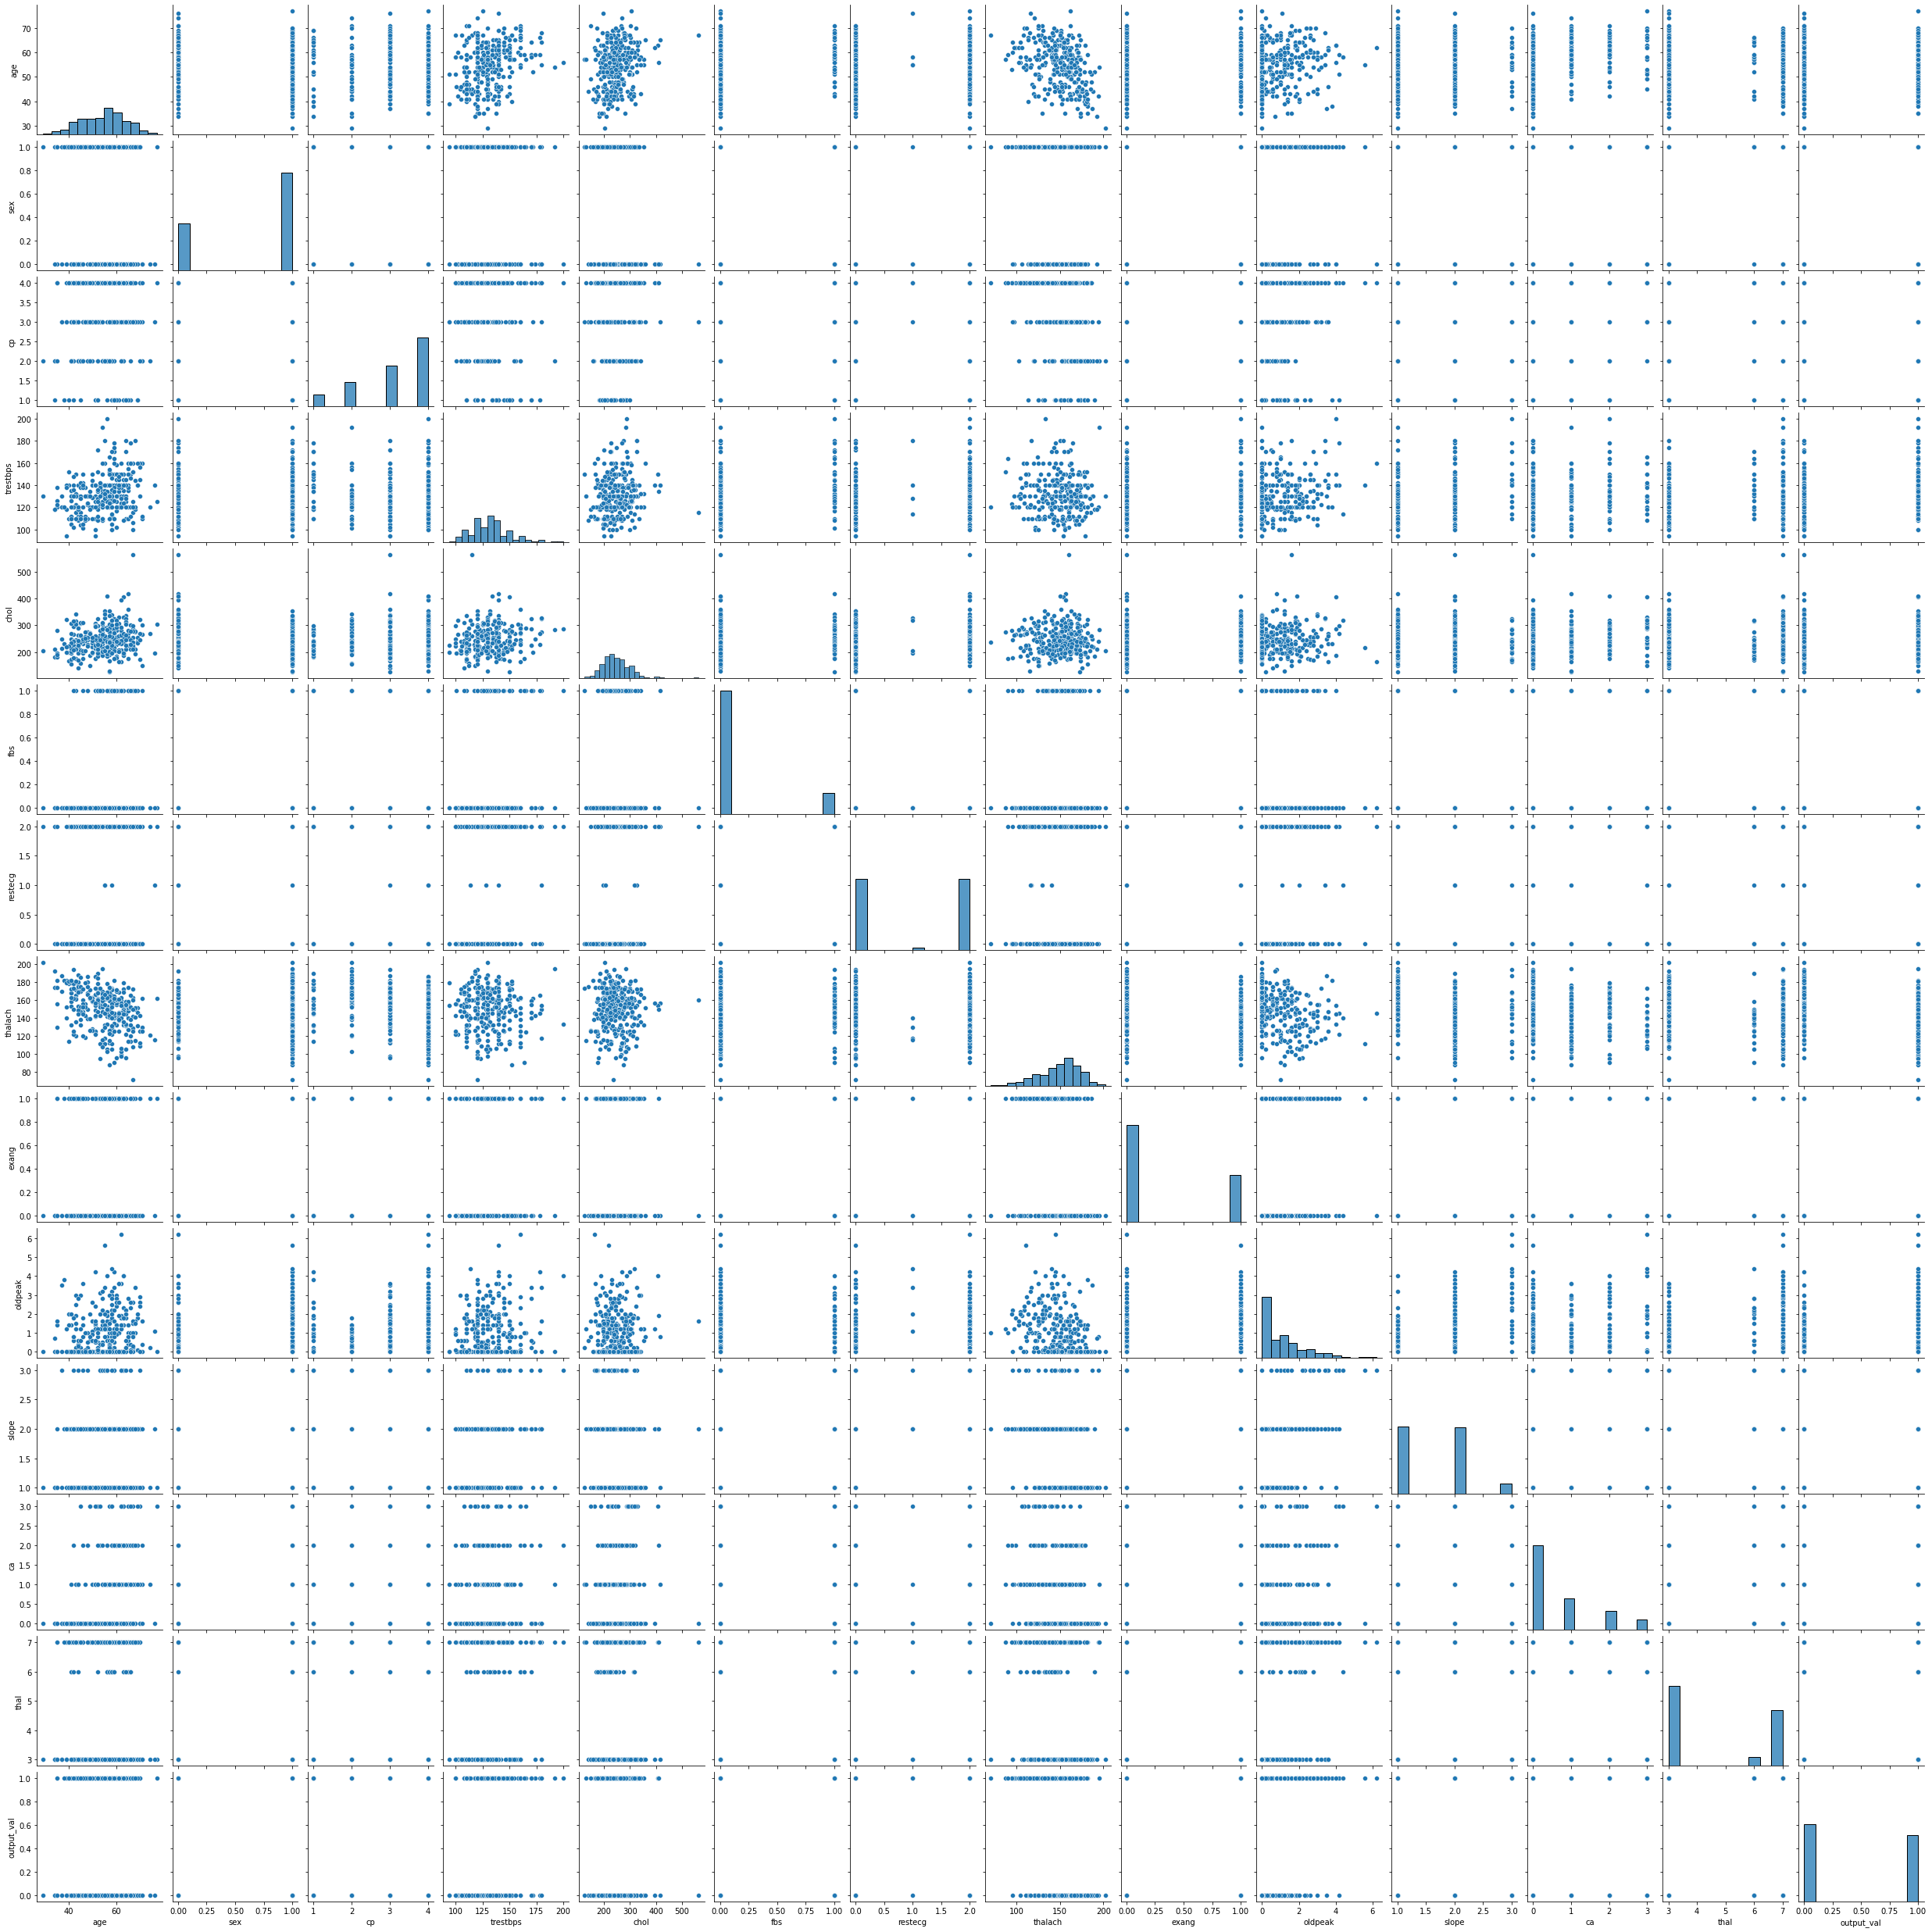

In [15]:
sns.pairplot(df)

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64


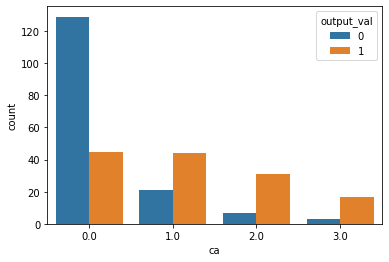

In [22]:
print(df['ca'].value_counts())
sns.countplot(x='ca',hue='output_val',data=df)

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64


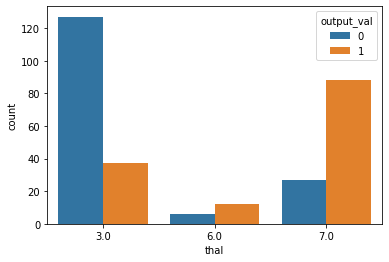

In [21]:
print(df['thal'].value_counts())
sns.countplot(x='thal',data=df, hue='output_val')

4.0    142
3.0     83
2.0     49
1.0     23
Name: cp, dtype: int64


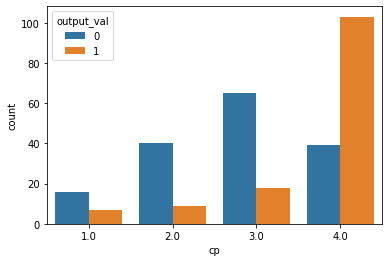

In [23]:
print(df['cp'].value_counts())
sns.countplot(x='cp' ,hue='output_val', data=df)

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output_val
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Splitting the data
The data is splitted into train and test parts to make sure that we can accurately evalute out model.

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x= df.drop(['output_val'], axis=1)
y= df['output_val']

In [132]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=40)

# Model Building
In this section we will try out various models and choose the model which gives the highest accuracy

## 1. Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model_1=lr.fit(x_train,y_train)
pred_1=model_1.predict(x_test)

In [134]:
from sklearn.metrics import confusion_matrix

cm_1=confusion_matrix(y_test,pred_1)
cm_1

array([[26,  3],
       [ 6, 25]])

In [135]:
from sklearn.metrics import accuracy_score
score_1=accuracy_score(y_test,pred_1)
print('The accuracy of LR for test data is :'+str(score_1))

The accuracy of LR for test data is :0.85


## 2. KNeighbors

In [137]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model_2 = KNN.fit(x_train, y_train)
pred_2 = model_2.predict(x_test)
cm_2= confusion_matrix(y_test, pred_2)
cm_2

array([[18, 11],
       [15, 16]])

In [138]:
score_2=accuracy_score(y_test,pred_2)
print('The accuracy of KNN for test data is :'+str(score_2))

The accuracy of KNN for test data is :0.5666666666666667


# 3.Descision TREE

In [139]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
model_3=dt.fit(x_train,y_train)
pred_3=model_3.predict(x_test)
cm3= confusion_matrix(y_test,pred_3)

cm

array([[27,  2],
       [ 7, 24]])

In [140]:
score_3=accuracy_score(y_test,pred_3)
print('The accuracy of descision Tree for test data is :'+str(score_3))

The accuracy of descision Tree for test data is :0.7166666666666667


# 4.Random Forest Classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier()
model_4 = RFC.fit(x_train, y_train)
pred_4 = model_4.predict(x_test)
confusion_matrix(y_test, pred_4)
cm

array([[27,  2],
       [ 7, 24]])

In [142]:
score_4=accuracy_score(y_test,pred_3)
print('The accuracy of Random Forest Classifier for test data is :'+str(score_4))

The accuracy of Random Forest Classifier for test data is :0.7166666666666667


In [143]:
print("various scores of the models are: ")
print("Logistic Regression: ",score_1)
print("K_nearest_neighbors: ",score_2)
print("Descision Tree: ",score_3)
print("Random forest: ",score_4)

various scores of the models are: 
Logistic Regression:  0.85
K_nearest_neighbors:  0.5666666666666667
Descision Tree:  0.7166666666666667
Random forest:  0.7166666666666667


In [57]:
## We CAN SEE THAT LOGISTIC REGRESSION GIVES US THE BEST ACCURACY THEREFORE WE WILL SELECT THAT AS OUR MAIN MODEL

In [60]:
#We will print the confusion matrix and classification report of our main model which is LR

The accuracy of the model is : 0.85
[[26  3]
 [ 6 25]]


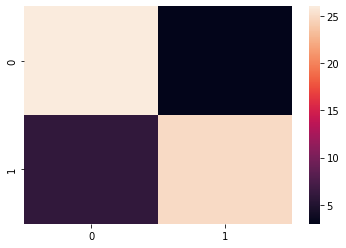

In [144]:
print("The accuracy of the model is :",score_1)

cm=confusion_matrix(y_test,pred_1)
print(cm)

sns.heatmap(cm)

In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_1))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.89      0.81      0.85        31

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



# Predicting the output

In [146]:
import warnings
warnings.filterwarnings(action='ignore')
col_scale = ['age','trestbps','chol','thalach','oldpeak']
case1=np.array([63,1,3,145,233,1,0,150,0,2.3,0,0,1]).reshape(1,-1)
pred=model_1.predict(case1)
if pred[0]==1:
  print("Your heart is healthy")
else:
  print("Go to a doctor soon")

Go to a doctor soon


In [74]:
import joblib
joblib.dump(model_1,'heart_disease_prediction')

['heart_disease_prediction']